In [1]:
from main import *
import creds
import pandas as pd
from datetime import datetime
# from operator import index

Get PWS measurement data from WU for selected days and combine into one table

In [2]:
date1= '20230501'
date2 = '20230502'
date3 = '20230503'

In [3]:
response_dict1 = get_daily_weather(station_id = 'IPOBIE4', api_key = creds.api_key, date = date1).json()
response_dict2 = get_daily_weather(station_id = 'IPOBIE4', api_key = creds.api_key, date = date2).json()
response_dict3 = get_daily_weather(station_id = 'IPOBIE4', api_key = creds.api_key, date = date3).json()

In [4]:
pws_obs1 = response_dict1['observations'][0]['metric']
pws_obs2 = response_dict2['observations'][0]['metric']
pws_obs3 = response_dict3['observations'][0]['metric']

In [5]:
dfs = pd.DataFrame([pws_obs1, pws_obs2, pws_obs3])
dfs

,tempHigh,tempLow,tempAvg,windspeedHigh,windspeedLow,windspeedAvg,windgustHigh,windgustLow,windgustAvg,dewptHigh,...,windchillLow,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,18.6,2.2,11.3,19.8,0.0,3.8,21.9,0.0,5.3,2.9,...,2.2,11.2,18.6,2.2,11.3,1029.63,1020.22,-0.37,0.00,0.0
1,19.9,8.8,13.6,22.4,0.0,7.0,31.4,0.0,9.3,9.3,...,7.4,13.6,19.9,8.8,13.6,1030.82,1018.93,0.42,1.19,0.2
2,15.7,4.9,10.3,15.4,0.0,2.8,20.1,0.0,3.8,4.1,...,4.9,10.2,15.7,4.9,10.3,1034.24,1030.61,0.11,0.00,0.0


Get current conditions and display station's ID, time and temperature

In [6]:
response_dict = get_current_weather(station_id = 'IPOBIE4', api_key = creds.api_key).json()
response_dict

{'observations': [{'stationID': 'IPOBIE4',
   'obsTimeUtc': '2023-05-09T09:53:37Z',
   'obsTimeLocal': '2023-05-09 11:53:37',
   'neighborhood': 'Pobiedziska',
   'softwareType': 'EasyWeatherV1.6.5',
   'country': 'PL',
   'solarRadiation': 601.9,
   'lon': 17.284,
   'realtimeFrequency': None,
   'epoch': 1683626017,
   'lat': 52.479,
   'uv': 5.0,
   'winddir': 32,
   'humidity': 35.0,
   'qcStatus': 1,
   'metric': {'temp': 15.6,
    'heatIndex': 15.6,
    'dewpt': 0.2,
    'windChill': 15.6,
    'windSpeed': 7.9,
    'windGust': 9.3,
    'pressure': 1032.04,
    'precipRate': 0.0,
    'precipTotal': 0.0,
    'elev': 32.9}}]}

In [7]:
pws_obs = response_dict['observations'][0]
pws_obs

{'stationID': 'IPOBIE4',
 'obsTimeUtc': '2023-05-09T09:53:37Z',
 'obsTimeLocal': '2023-05-09 11:53:37',
 'neighborhood': 'Pobiedziska',
 'softwareType': 'EasyWeatherV1.6.5',
 'country': 'PL',
 'solarRadiation': 601.9,
 'lon': 17.284,
 'realtimeFrequency': None,
 'epoch': 1683626017,
 'lat': 52.479,
 'uv': 5.0,
 'winddir': 32,
 'humidity': 35.0,
 'qcStatus': 1,
 'metric': {'temp': 15.6,
  'heatIndex': 15.6,
  'dewpt': 0.2,
  'windChill': 15.6,
  'windSpeed': 7.9,
  'windGust': 9.3,
  'pressure': 1032.04,
  'precipRate': 0.0,
  'precipTotal': 0.0,
  'elev': 32.9}}

In [8]:
pws_obs['metric']

{'temp': 15.6,
 'heatIndex': 15.6,
 'dewpt': 0.2,
 'windChill': 15.6,
 'windSpeed': 7.9,
 'windGust': 9.3,
 'pressure': 1032.04,
 'precipRate': 0.0,
 'precipTotal': 0.0,
 'elev': 32.9}

In [9]:
print('Station ID: ', pws_obs['stationID'])
print('Date: ', datetime.strptime(date1, '%Y%m%d').strftime('%d/%m/%Y'))
print('Temperature: ', pws_obs['metric']['temp'])

Station ID:  IPOBIE4
Date:  01/05/2023
Temperature:  15.6


Get data from a month

In [10]:
month = get_monthly_weather('IPOBIE4', creds.api_key, 2023, 4)
month[0]

<Response [200]>

In [11]:
daily = []
for day in month:
    day_json = day.json()
    pws_obs = day_json['observations'][0]['metric']
    daily.append(pws_obs)

daily

[{'tempHigh': 8.6,
  'tempLow': 3.3,
  'tempAvg': 7.0,
  'windspeedHigh': 26.2,
  'windspeedLow': 0.0,
  'windspeedAvg': 8.8,
  'windgustHigh': 34.9,
  'windgustLow': 0.0,
  'windgustAvg': 11.1,
  'dewptHigh': 8.1,
  'dewptLow': 1.6,
  'dewptAvg': 6.1,
  'windchillHigh': 8.6,
  'windchillLow': -1.3,
  'windchillAvg': 5.5,
  'heatindexHigh': 8.6,
  'heatindexLow': 3.3,
  'heatindexAvg': 7.0,
  'pressureMax': 1015.04,
  'pressureMin': 1002.54,
  'pressureTrend': 0.49,
  'precipRate': 1.8,
  'precipTotal': 5.89},
 {'tempHigh': 5.9,
  'tempLow': 0.1,
  'tempAvg': 3.3,
  'windspeedHigh': 33.5,
  'windspeedLow': 6.1,
  'windspeedAvg': 17.3,
  'windgustHigh': 42.2,
  'windgustLow': 7.2,
  'windgustAvg': 21.3,
  'dewptHigh': 1.8,
  'dewptLow': -4.3,
  'dewptAvg': -0.5,
  'windchillHigh': 3.8,
  'windchillLow': -5.4,
  'windchillAvg': -0.6,
  'heatindexHigh': 5.9,
  'heatindexLow': 0.1,
  'heatindexAvg': 3.3,
  'pressureMax': 1032.44,
  'pressureMin': 1014.83,
  'pressureTrend': 0.72,
  'precip

In [12]:
daily_dfs = pd.DataFrame(daily)
daily_dfs

,tempHigh,tempLow,tempAvg,windspeedHigh,windspeedLow,windspeedAvg,windgustHigh,windgustLow,windgustAvg,dewptHigh,...,windchillLow,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,8.6,3.3,7.0,26.2,0.0,8.8,34.9,0.0,11.1,8.1,...,-1.3,5.5,8.6,3.3,7.0,1015.04,1002.54,0.49,1.80,5.89
1,5.9,0.1,3.3,33.5,6.1,17.3,42.2,7.2,21.3,1.8,...,-5.4,-0.6,5.9,0.1,3.3,1032.44,1014.83,0.72,0.00,0.00
2,5.1,-1.7,1.4,33.8,1.8,14.0,40.4,1.8,17.3,-2.8,...,-7.2,-2.3,5.1,-1.7,1.4,1035.83,1032.24,0.12,0.00,0.00
3,4.6,-1.4,1.3,24.5,0.0,6.6,33.2,0.0,8.3,-3.4,...,-5.2,-0.4,4.6,-1.4,1.3,1035.32,1029.73,-0.21,0.00,0.00
4,5.8,-2.5,1.5,15.8,0.0,3.0,20.1,0.0,4.1,-2.5,...,-2.7,1.1,5.8,-2.5,1.5,1030.14,1027.53,-0.06,0.00,0.00
5,7.3,-3.4,2.7,22.4,0.0,5.0,27.7,0.0,6.5,-0.2,...,-3.5,1.9,7.3,-3.4,2.7,1029.73,1026.21,-0.09,0.00,0.00
6,7.9,1.3,4.5,17.2,0.0,7.2,20.1,0.0,8.9,7.4,...,-2.8,2.8,7.9,1.3,4.5,1026.62,1023.13,-0.02,4.80,5.79
7,12.5,2.2,7.0,14.8,0.0,2.5,18.3,0.0,3.7,6.3,...,1.9,6.9,12.5,2.2,7.0,1032.34,1025.74,0.26,0.00,0.00
8,10.9,5.3,7.7,16.3,0.0,4.8,20.1,0.0,6.2,7.9,...,2.6,7.3,10.9,5.3,7.7,1032.61,1030.92,-0.01,0.00,0.00
9,15.5,2.7,9.2,10.5,0.0,1.9,13.0,0.0,2.7,10.1,...,2.7,9.2,15.5,2.7,9.2,1033.32,1024.82,-0.30,0.00,0.00


<AxesSubplot:xlabel='Day', ylabel='Temperature'>

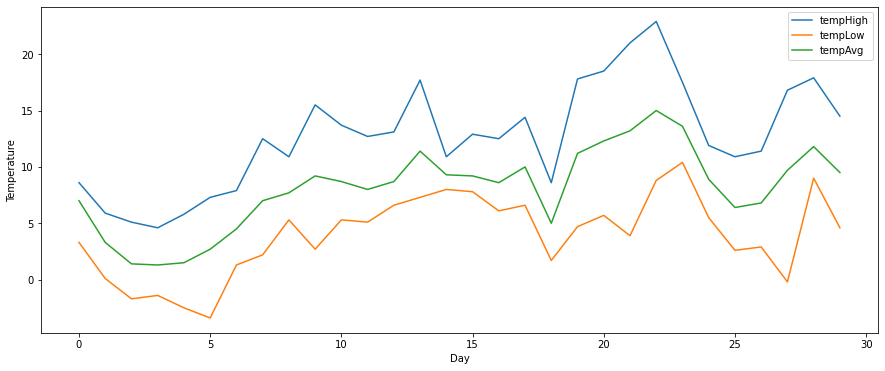

In [13]:
daily_dfs.plot(y = ['tempHigh', 'tempLow', 'tempAvg'], figsize=(15, 6), xlabel='Day', ylabel='Temperature')

In [14]:
df_precipSum = daily_dfs[['precipTotal']].cumsum(axis = 0).rename(columns = {'precipTotal':'precipSum'})
df_precipSum

,precipSum
0,5.89
1,5.89
2,5.89
3,5.89
4,5.89
5,5.89
6,11.68
7,11.68
8,11.68
9,11.68


In [15]:
dfs_merged = pd.concat([daily_dfs, df_precipSum], axis = 1)
dfs_merged

,tempHigh,tempLow,tempAvg,windspeedHigh,windspeedLow,windspeedAvg,windgustHigh,windgustLow,windgustAvg,dewptHigh,...,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal,precipSum
0,8.6,3.3,7.0,26.2,0.0,8.8,34.9,0.0,11.1,8.1,...,5.5,8.6,3.3,7.0,1015.04,1002.54,0.49,1.80,5.89,5.89
1,5.9,0.1,3.3,33.5,6.1,17.3,42.2,7.2,21.3,1.8,...,-0.6,5.9,0.1,3.3,1032.44,1014.83,0.72,0.00,0.00,5.89
2,5.1,-1.7,1.4,33.8,1.8,14.0,40.4,1.8,17.3,-2.8,...,-2.3,5.1,-1.7,1.4,1035.83,1032.24,0.12,0.00,0.00,5.89
3,4.6,-1.4,1.3,24.5,0.0,6.6,33.2,0.0,8.3,-3.4,...,-0.4,4.6,-1.4,1.3,1035.32,1029.73,-0.21,0.00,0.00,5.89
4,5.8,-2.5,1.5,15.8,0.0,3.0,20.1,0.0,4.1,-2.5,...,1.1,5.8,-2.5,1.5,1030.14,1027.53,-0.06,0.00,0.00,5.89
5,7.3,-3.4,2.7,22.4,0.0,5.0,27.7,0.0,6.5,-0.2,...,1.9,7.3,-3.4,2.7,1029.73,1026.21,-0.09,0.00,0.00,5.89
6,7.9,1.3,4.5,17.2,0.0,7.2,20.1,0.0,8.9,7.4,...,2.8,7.9,1.3,4.5,1026.62,1023.13,-0.02,4.80,5.79,11.68
7,12.5,2.2,7.0,14.8,0.0,2.5,18.3,0.0,3.7,6.3,...,6.9,12.5,2.2,7.0,1032.34,1025.74,0.26,0.00,0.00,11.68
8,10.9,5.3,7.7,16.3,0.0,4.8,20.1,0.0,6.2,7.9,...,7.3,10.9,5.3,7.7,1032.61,1030.92,-0.01,0.00,0.00,11.68
9,15.5,2.7,9.2,10.5,0.0,1.9,13.0,0.0,2.7,10.1,...,9.2,15.5,2.7,9.2,1033.32,1024.82,-0.30,0.00,0.00,11.68


In [16]:
dfs_merged.to_excel('out.xlsx')

Text(0, 0.5, 'Precipitation/day')

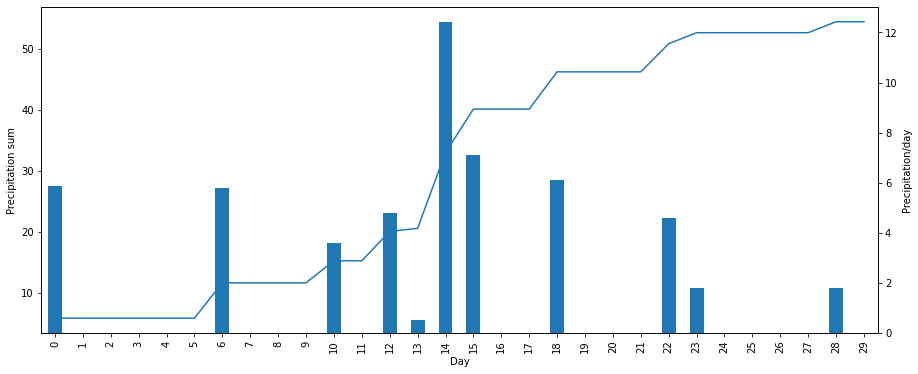

In [17]:
dfs_merged['precipSum'].plot(figsize=(15, 6), ylabel='Precipitation sum')
dfs_merged['precipTotal'].plot(secondary_y = True, kind = 'bar', figsize=(15, 6), xlabel='Day').set_ylabel('Precipitation/day')

In [18]:
year = get_yearly_weather('IPOBIE4', creds.api_key, 2022)
print(len(year))

365
